# Practice 1: Regression
In this notebook, we are going to introduce how to train a linear regression model and a generalized additive model.

We will also introduce how to visualize the data to interpret the model behavior.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
df = pd.DataFrame(data=X.values, columns=X.columns)
df['y_true'] = y

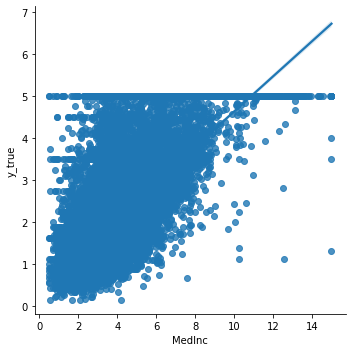

In [ ]:
sns.lmplot(x="MedInc", y="y_true", data=df)

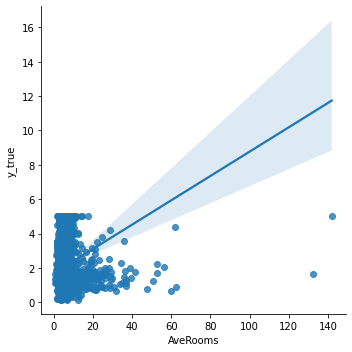

In [ ]:
sns.lmplot(x="AveRooms", y="y_true", data=df)


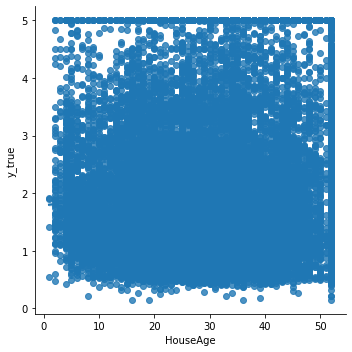

In [ ]:
sns.lmplot(x="HouseAge", y="y_true", data=df)

## Linear Model

In [ ]:
'''train the linear regression model'''
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X, y)

LinearRegression()

In [ ]:
reg.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [ ]:
cof_df = pd.DataFrame(data=reg.coef_.reshape(1,-1), columns=X.columns)
cof_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.436693,0.009436,-0.107322,0.645066,-0.000004,-0.003787,-0.421314,-0.434514


In [ ]:
'''report the performance of the linear model on test'''
'''MAE'''
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X)
mean_absolute_error(y, y_pred)

0.5311643817546476

In [ ]:
'''R Squared'''
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.606232685199805

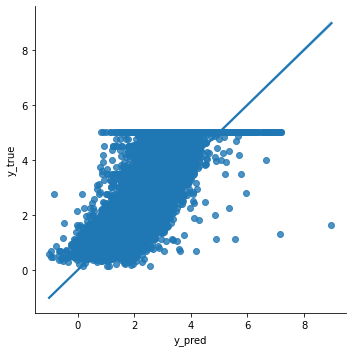

In [ ]:
df['y_pred'] = y_pred
sns.lmplot(x="y_pred", y="y_true", data=df);

## GAMs
What can we visualize for a Gneralized Additive Model?

GAMs are usually in a format of:
𝑔 (𝑦) = 𝛽0 + 𝑓1 (𝑥1) + 𝑓2 (𝑥2) + · · · + 𝑓𝑀 (𝑥𝑀 )

We can use Partial Dependency Plot (PDP) to visualize how each feature influence the result.

In [ ]:
!pip install pygam

     |████████████████████████████████| 1.8 MB 10.2 MB/s 


In [ ]:
from pygam import LinearGAM, s

- s(): spline terms (Spline is a special function defined piece-wise by polynomials)

For this regression problem, we can train a linear GAM which models:

𝔼[𝑦|𝑋]=𝛽0+𝑓1(𝑋1)+𝑓2(𝑋2,𝑋3)+⋯+𝑓𝑀(𝑋𝑁)

In [ ]:
gam = LinearGAM(n_splines=25).gridsearch(X.values, y)

100% (11 of 11) |########################| Elapsed Time: 0:00:31 Time:  0:00:31


In [ ]:
gam_pred = gam.predict(X)

r2_score(y, gam_pred)


0.7309530109237047

- How do we understand each "smooth function"?

- Partial Dependency Plot!


sklearn, interpret_ml provide PDP visualization functions.

pygam provide function to calculate the results for plotting a PDP.

In [ ]:
XX = gam.generate_X_grid(term=0)
XX

array([[ 0.4999    ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.64636667,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.79283333,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.9393    ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.08576667,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.23223333,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.3787    ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.52516667,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.67163333,  0.        

<Figure size 720x360 with 0 Axes>

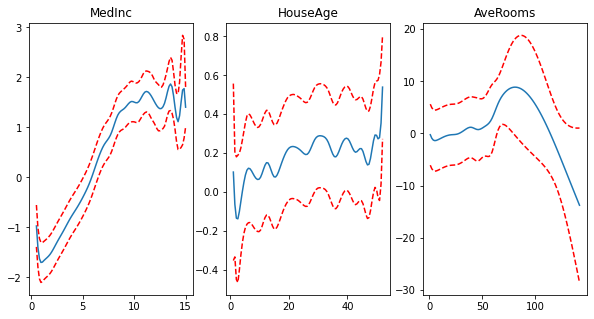

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]

plt.figure()
fig, axs = plt.subplots(1,3)

col = [0, 1, 2]
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=col[i]) # generate an array with only values in the col[i]-th column, and set 0 for other columns
    ax.plot(XX[:, i], gam.partial_dependence(term=col[i], X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=col[i], X=XX, width=.95)[1], c='r', ls='--')

    ax.set_title(df.columns[col[i]])

plt.show()

In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'y_true', 'y_pred'],
      dtype='object')

How does the PDP for "AveBedrms" look like?

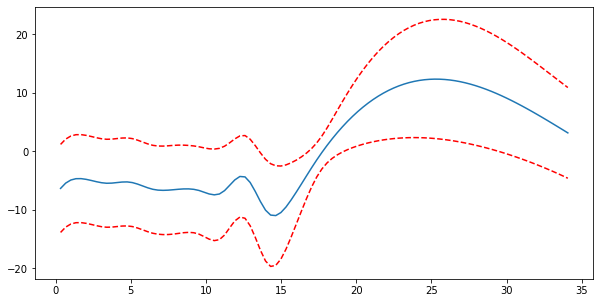

In [ ]:
plt.figure()

XX = gam.generate_X_grid(term=3) # generate an array with only values in the col[i]-th column, and set 0 for other columns
plt.plot(XX[:, 3], gam.partial_dependence(term=3, X=XX))
plt.plot(XX[:, 3], gam.partial_dependence(term=3, X=XX, width=.95)[1], c='r', ls='--')

plt.show()